# Health Insurance Cost Prediction - machine learning

### import required libraries:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### load the data

In [3]:
# loading csv file data to a pandas dataframe
insurance_data = pd.read_csv("datasets_13720_18513_insurance(1).csv")

In [4]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# print first 5 rows of the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# print last 5 rows of the dataset
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### number of records and columns

In [7]:
insurance_data.shape

(1338, 7)

### list of columns:

In [8]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## column datatype

In [9]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### data information:

In [10]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### check duplicate records:

In [11]:
insurance_data.duplicated().any()

True

In [12]:
insurance_data[insurance_data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
insurance_data1=insurance_data.drop_duplicates()

In [14]:
insurance_data1.shape

(1337, 7)

### check missing values:

In [15]:
insurance_data1.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [16]:
insurance_data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### List of categorical and numeric columns

In [17]:
numerical_columns = insurance_data1.select_dtypes(include="number").columns.to_list()
categorical_columns=insurance_data1.select_dtypes(exclude="number").columns.to_list()
print(f"numerical columns in the data : {numerical_columns}")
print(f"categorical columns in the data : {categorical_columns}")


numerical columns in the data : ['age', 'bmi', 'children', 'charges']
categorical columns in the data : ['sex', 'smoker', 'region']


### statistical measure of numeric columns:

In [18]:
insurance_data1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### statistical measure of numeric columns:

In [19]:
insurance_data1.describe(exclude="number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [20]:
insurance_data1["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [21]:
insurance_data1["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [22]:
insurance_data1["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [23]:
insurance_data1["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
insurance_data1["region"].nunique()

4

# data visualization


### histogram numeric columns:

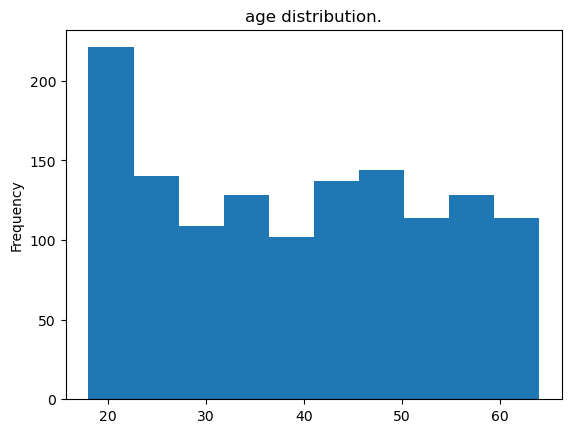

In [25]:
insurance_data1['age'].plot(kind='hist')
plt.title("age distribution.")
plt.show()

C:\Users\Sunilkumar\AppData\Local\Temp\ipykernel_13336\2820931654.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data1['age'])


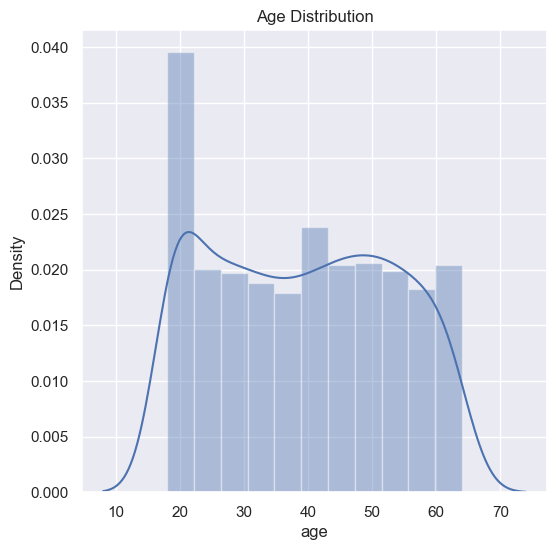

In [26]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data1['age'])
plt.title('Age Distribution')
plt.show()

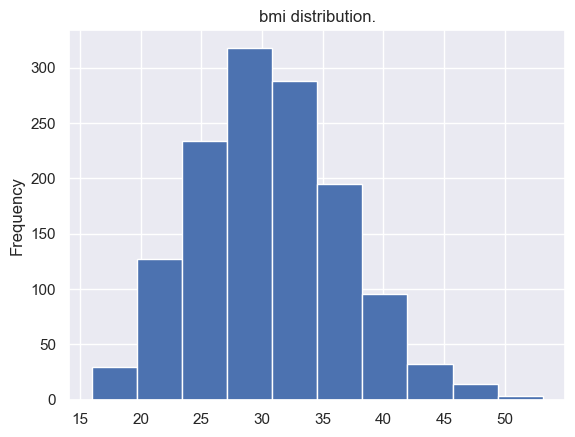

In [27]:
insurance_data1['bmi'].plot(kind='hist')
plt.title("bmi distribution.")
plt.show()

C:\Users\Sunilkumar\AppData\Local\Temp\ipykernel_13336\1688694495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data1['bmi'])


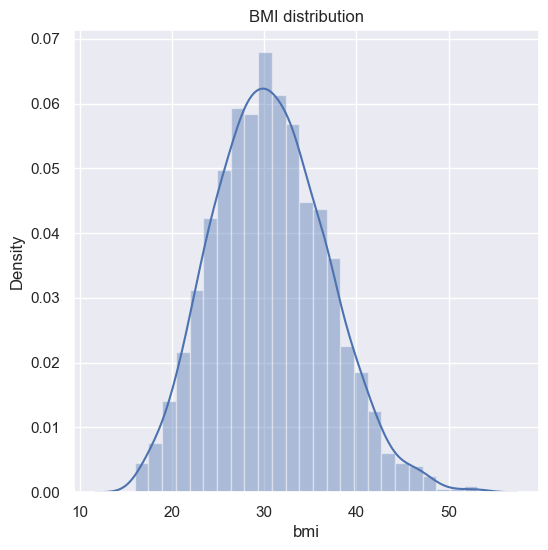

In [28]:
# BMI distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data1['bmi'])
plt.title('BMI distribution')
plt.show()

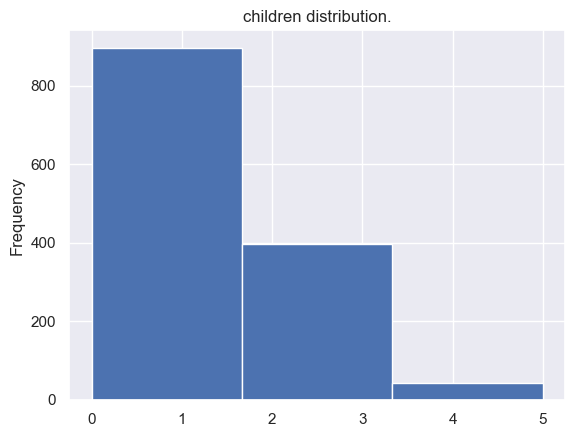

In [29]:
insurance_data1['children'].plot(kind='hist',bins=3)
plt.title("children distribution.")
plt.show()

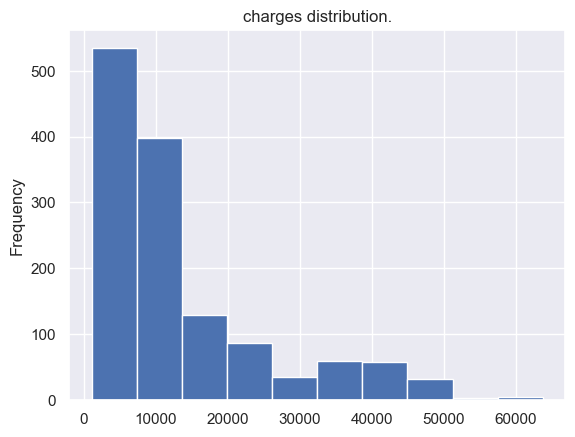

In [30]:
insurance_data1['charges'].plot(kind='hist')
plt.title("charges distribution.")
plt.show()

# bar graph-categorical columns:

<Axes: xlabel='children'>

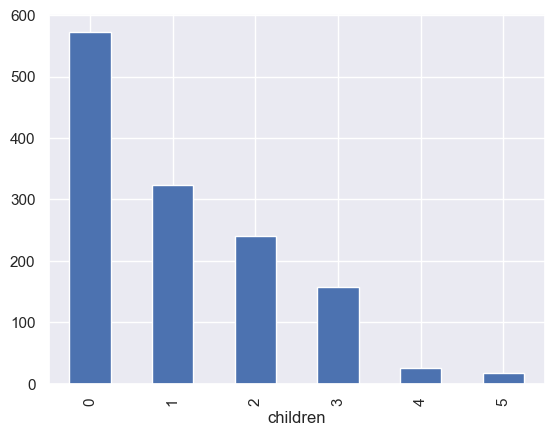

In [31]:
insurance_data1["children"].value_counts().plot(kind='bar')

<Axes: xlabel='sex'>

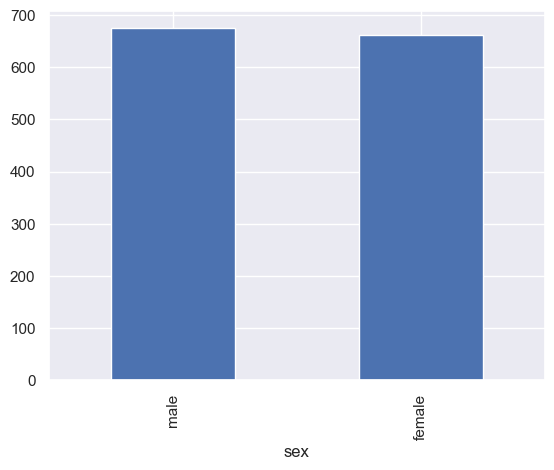

In [32]:
insurance_data1["sex"].value_counts().plot(kind='bar')

<Axes: xlabel='region'>

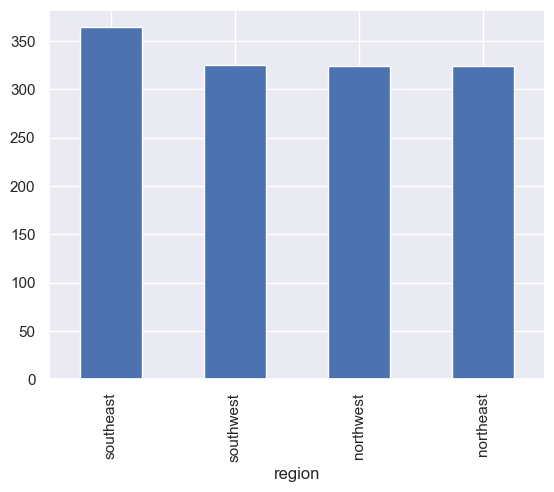

In [33]:
insurance_data1["region"].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

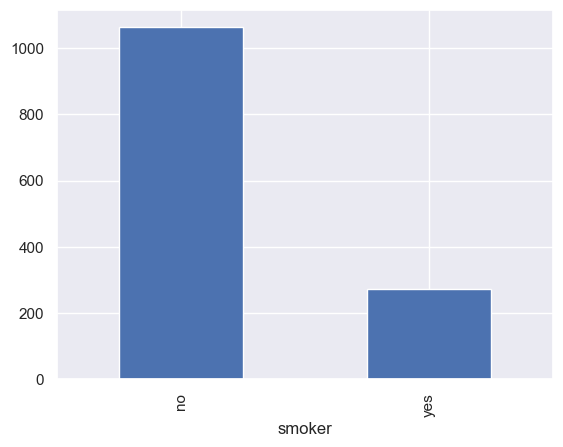

In [34]:
insurance_data1["smoker"].value_counts().plot(kind='bar')

### box plot numeric columns

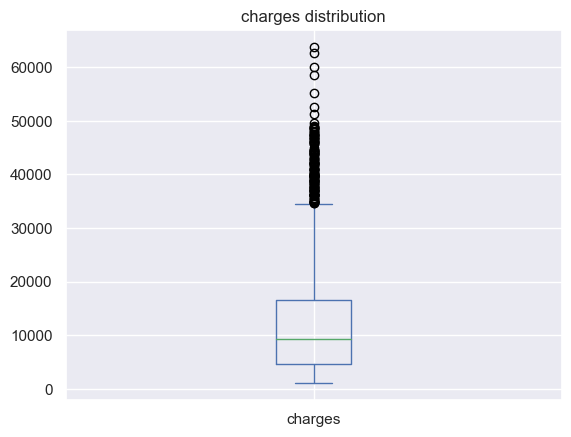

In [35]:
insurance_data1["charges"].plot(kind='box')
plt.title("charges distribution")
plt.show()

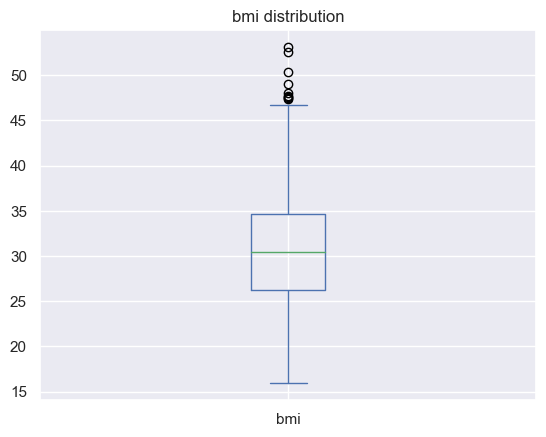

In [36]:
insurance_data1["bmi"].plot(kind='box')
plt.title("bmi distribution")
plt.show()

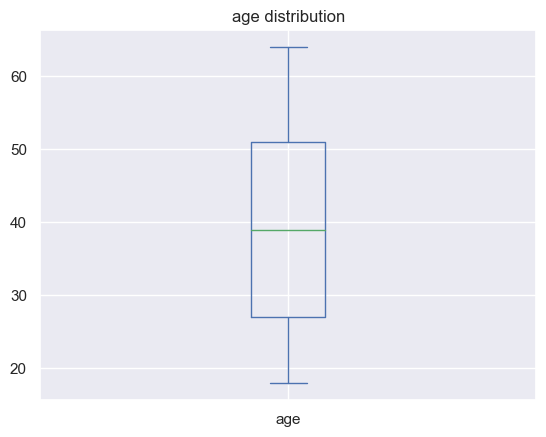

In [37]:
insurance_data1["age"].plot(kind='box')
plt.title("age distribution")
plt.show()

### pie chart- region

In [38]:
region_count=insurance_data1['region'].value_counts()
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

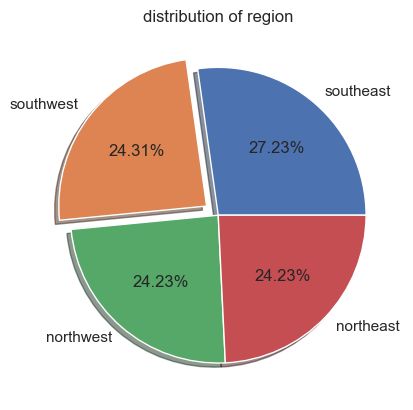

In [39]:
plt.pie(labels=region_count.index,
       x=region_count.values,
       shadow=True,
       autopct='%.2f%%',
       explode=(0,0.1,0,0))
plt.title("distribution of region")
plt.show()

# correaltion matirx:

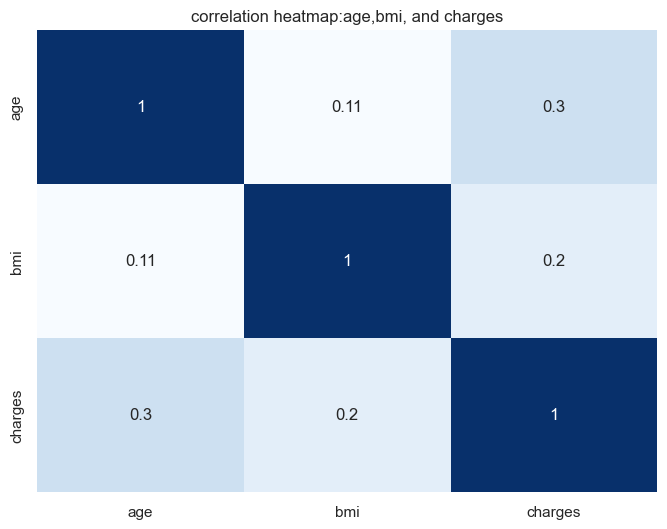

In [40]:
corr_data = insurance_data1[["age","bmi","charges"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(round(corr_data,2),annot=True,cmap="Blues",cbar=False)
plt.title("correlation heatmap:age,bmi, and charges")
plt.show()

Text(0.5, 1.0, 'correlation heatmap:age,bmi, sex,children,smoker,region and charges')

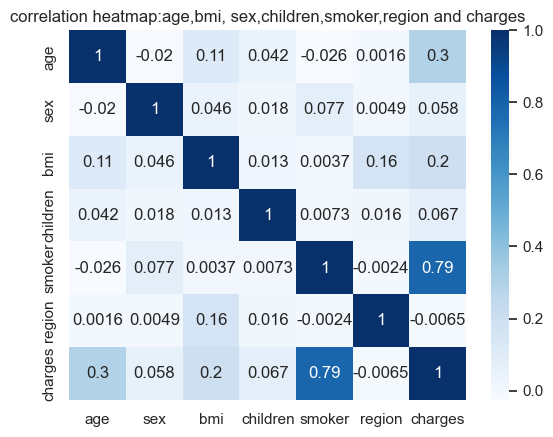

In [123]:
sns.heatmap(insurance_data1.corr(),annot=True,cmap="Blues")
plt.title("correlation heatmap:age,bmi, sex,children,smoker,region and charges")


### # scatter plot:

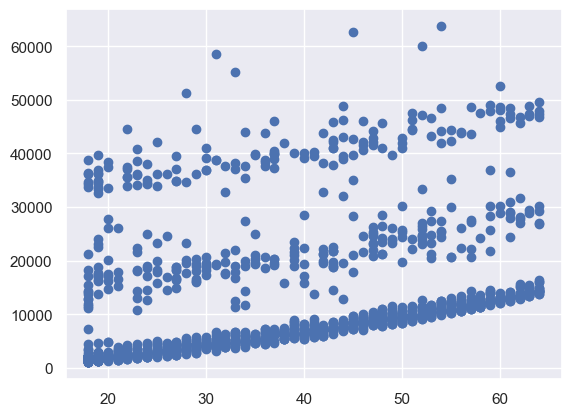

In [70]:
plt.scatter(data=insurance_data1,x="age",y="charges")

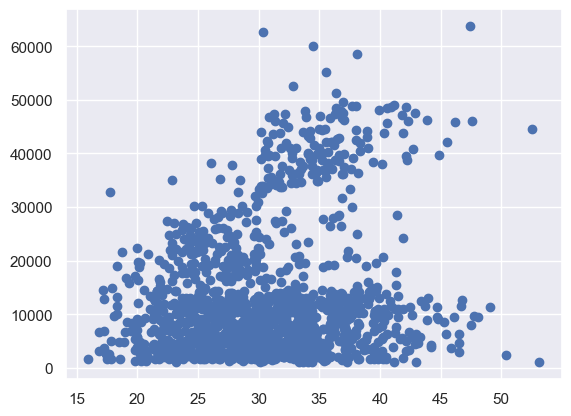

In [71]:
plt.scatter(data=insurance_data1,x="bmi",y="charges")

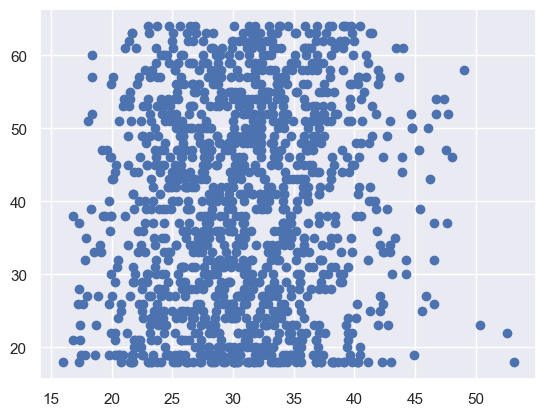

In [72]:
plt.scatter(data=insurance_data1,x="bmi",y="age")

### insurance cost for smoker and non smoker

In [73]:
smoker_df=insurance_data1.groupby("smoker")["charges"].mean().reset_index()
smoker_df

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


<Axes: xlabel='smoker'>

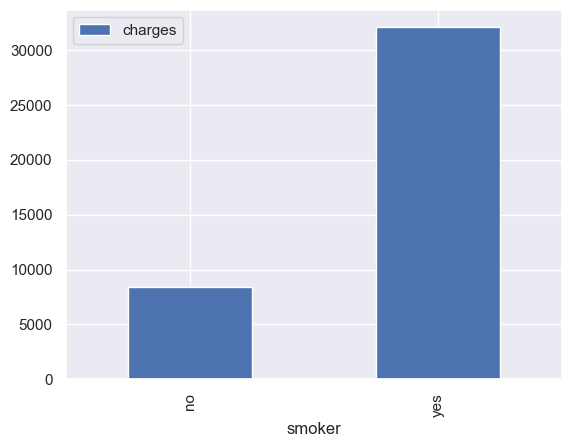

In [74]:
smoker_df.plot(kind='bar',x='smoker',y='charges')

### insurance cost for male and female:

In [75]:
gender_df=insurance_data1.groupby("sex")["charges"].mean().reset_index()
gender_df

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

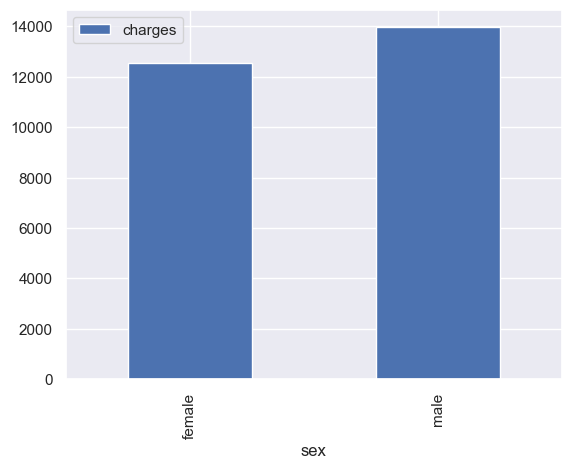

In [76]:
gender_df.plot(kind='bar',x='sex',y='charges')

### region wise insurance cost:

In [77]:
region_df=insurance_data1.groupby("region")["charges"].mean().reset_index()
region_df

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region'>

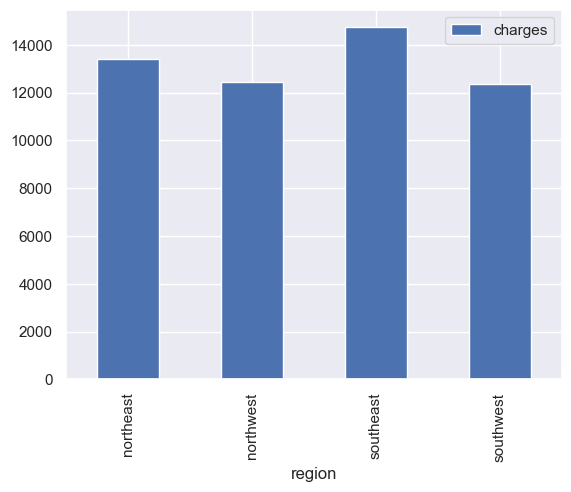

In [78]:
region_df.plot(kind='bar',x='region',y='charges')

### region wise bmi

In [79]:
region_bmi_df=insurance_data1.groupby("region")["bmi"].mean().reset_index()
region_bmi_df

,region,bmi
0,northeast,29.173503
1,northwest,29.195494
2,southeast,33.355989
3,southwest,30.596615


<Axes: xlabel='region'>

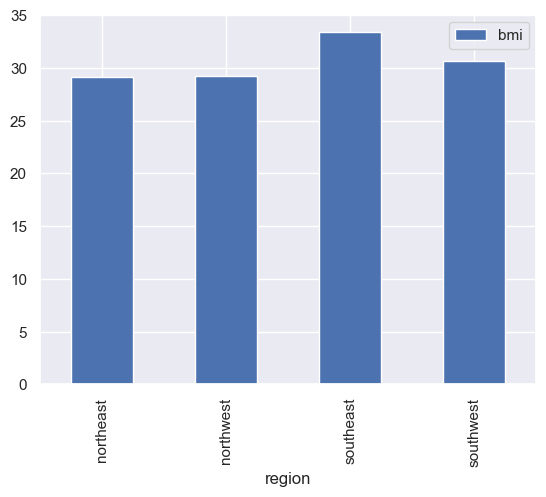

In [80]:
region_bmi_df.plot(kind='bar',x='region',y='bmi')

### machine learning model development:

In [81]:
insurance_data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### label encoding

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [83]:
insurance_data1['sex']=le.fit_transform(insurance_data1['sex'])
insurance_data1['smoker']=le.fit_transform(insurance_data1['smoker'])
insurance_data1['region']=le.fit_transform(insurance_data1['region'])

C:\Users\Sunilkumar\AppData\Local\Temp\ipykernel_13336\738191350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data1['sex']=le.fit_transform(insurance_data1['sex'])
C:\Users\Sunilkumar\AppData\Local\Temp\ipykernel_13336\738191350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data1['smoker']=le.fit_transform(insurance_data1['smoker'])
C:\Users\Sunilkumar\AppData\Local\Temp\ipykernel_13336\738191350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [84]:
insurance_data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### x-independent variable
### y- dependent variable

In [85]:
x=insurance_data1.drop(columns=['charges'],axis=1)
y=insurance_data1["charges"]

In [86]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [87]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

### split the data into training and testing:

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
## check the shape of spliting data
print(f"the shape of x_train: {x_train.shape}")
print(f"the shape of y_train:{y_train.shape}")

print("*"*30)

print(f"the shape of x_test:{x_test.shape}")
print(f"the shape of y_test:{y_test.shape}")

the shape of x_train: (1069, 6)
the shape of y_train:(1069,)
******************************
the shape of x_test:(268, 6)
the shape of y_test:(268,)


### feature scaling

In [90]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [91]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [92]:
x['age']=std_scaler.fit_transform(np.array(x['age']).reshape(-1,1))
x['bmi']=std_scaler.fit_transform(np.array(x['bmi']).reshape(-1,1))
x['children']=std_scaler.fit_transform(np.array(x['children']).reshape(-1,1))

In [93]:
x

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


### develop linear regression model:

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
linear_reg_model=LinearRegression()

In [96]:
linear_reg_model.fit(x_train,y_train)

LinearRegression()

# cross validation:

In [97]:
from sklearn.model_selection import cross_val_score,cross_validate

In [98]:
result=cross_validate(linear_reg_model,x,y,cv=5,return_train_score=True,scoring='r2')
result

{'fit_time': array([0.00800109, 0.00848365, 0.00401998, 0.00586605, 0.00953126]),
 'score_time': array([0.00845957, 0.00529385, 0.00589514, 0.00599837, 0.00499749]),
 'test_score': array([0.76123487, 0.70840689, 0.77720769, 0.73365562, 0.7551376 ]),
 'train_score': array([0.74737531, 0.75930033, 0.74326474, 0.75468466, 0.74915469])}

In [99]:
train_acc=result['train_score'].mean()*100
print('training accuracy=',round(train_acc,2),"%")

training accuracy= 75.08 %


In [100]:
test_acc=result['test_score'].mean()*100
print('test accuracy=',round(test_acc,2),"%")

test accuracy= 74.71 %


### multiple models:

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [102]:
models=[]
models.append(("Linear Regression",LinearRegression()))
models.append(("Knn",KNeighborsRegressor()))
models.append(("DecisionTreeRegressor",DecisionTreeRegressor()))
models.append(("RandomForestRegressor",RandomForestRegressor()))
for model in models:
    result=cross_validate(model[1],x,y,cv=5,return_train_score=True,scoring='r2')
    print(model[0])
    train_acc=round((result['train_score'].mean())*100,2)
    test_acc=round((result['test_score'].mean())*100,2)
    print(f"Train R2score:{train_acc}")
    print(f"Test R2score:{test_acc}")
    print('\n')

Linear Regression
Train R2score:75.08
Test R2score:74.71


Knn
Train R2score:81.44
Test R2score:68.87


DecisionTreeRegressor
Train R2score:99.9
Test R2score:71.38


RandomForestRegressor
Train R2score:97.65
Test R2score:83.6




## Random forest hypermeter tuning using randomsearch.

In [103]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [104]:
params={
    'n_estimators':[100,200,300],# number of trees in random forest
    'max_depth':[None,5,10],# maximum number of levels in tree
    'min_samples_split':[2,5,10],# minimum number of samples required to split a node
    'min_samples_leaf':[1,2,4],# minimum number of samples required at each leaf node
    'bootstrap':[True,False],# method of selecting samples for training each tree
}
## tunning using random search
random_search = RandomizedSearchCV(
    param_distributions=params,# specify the parameter distributions to sample from
    estimator=RandomForestRegressor(),# specify the estimator to use
    cv=5,# number of cross-validation folds
    return_train_score=True,# include training scores in the results
    scoring='r2',# scoring metric to optimize
    n_jobs=-1 # use all available cpu cores for parallel observations
)

In [105]:
random_search.fit(x,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')

In [106]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 10,
 'bootstrap': True}

In [107]:
random_search.cv_results_['mean_train_score'].mean()*100

91.56440664708836

In [108]:
random_search.cv_results_['mean_test_score'].mean()*100

83.08139949430056

In [109]:
RF=RandomForestRegressor(n_estimators=100,
                        min_samples_split=5,
                        min_samples_leaf=2,
                        max_depth=5,
                        bootstrap=True)

In [110]:
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [111]:
from sklearn.metrics import r2_score

In [112]:
predicted_train_data=RF.predict(x_train)
train_score=r2_score(y_true=y_train,y_pred=predicted_train_data)
predicted_test_data=RF.predict(x_test)
test_score=r2_score(y_true=y_test,y_pred=predicted_test_data)
print(f"R-squared(r^2) for training data using random forest :{round(train_score,2)*100}%")
print(f"R-squared(r^2) for testing data using random forest :{round(test_score,2)*100}%")

R-squared(r^2) for training data using random forest :88.0%
R-squared(r^2) for testing data using random forest :90.0%


## create a scatter plot with a regression line

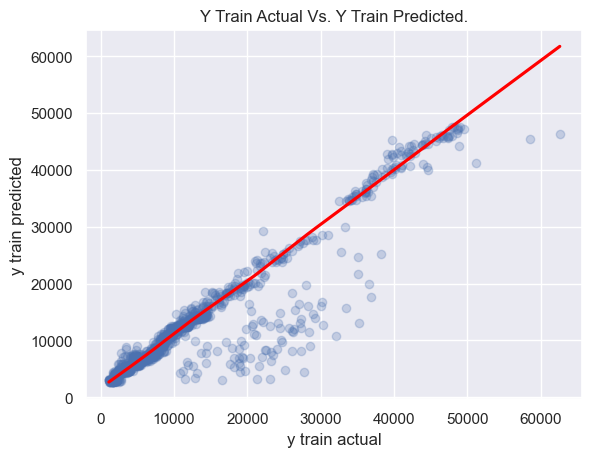

In [113]:
sns.regplot(x=y_train,y=predicted_train_data,
           lowess=True,## add a locally weighted scatterplot smooting line
           line_kws={'color':'red'},## the color of the regression line
           scatter_kws={'alpha':0.25})## the transparency of the scatter points

plt.title("y train actual vs. y train predicted.".title())
plt.xlabel("y train actual")
plt.ylabel("y train predicted")
plt.show()

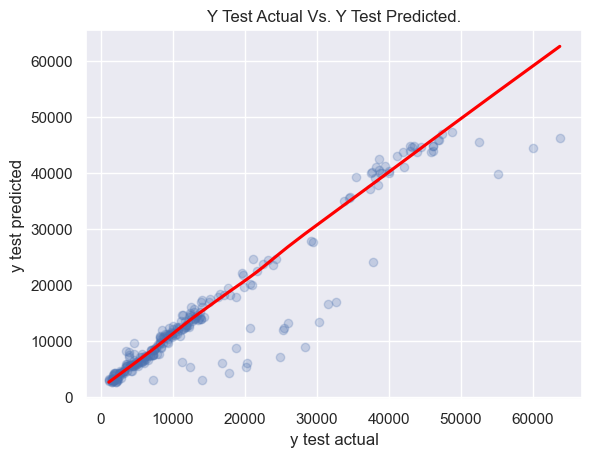

In [114]:
sns.regplot(x=y_test,y=predicted_test_data,
           lowess=True,## add a locally weighted scatterplot smooting line
           line_kws={'color':'red'},## the color of the regression line
           scatter_kws={'alpha':0.25})## the transparency of the scatter points

plt.title("y test actual vs. y test predicted.".title())
plt.xlabel("y test actual")
plt.ylabel("y test predicted")
plt.show()

In [115]:
x

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


In [116]:
insurance_data1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## customized predictions:

In [117]:
age=28
sex=1
bmi=33.000
children=3
smoker=0
region=2


In [118]:
age1=std_scaler.fit_transform([[28]])
age1[0][0]

0.0

In [119]:
age1=std_scaler.transform([[24]])
bmi1=std_scaler.transform([[33.000]])
cld1=std_scaler.transform([[3]])

In [120]:
print(age1)
print(bmi1)
print(cld1)

[[-4.]]
[[5.]]
[[-25.]]


In [121]:
RF.predict([[age1[0][0],sex,bmi1[0][0],cld1[0][0],smoker,region]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3295.25699322])

In [122]:
input_data=(31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=RF.predict(input_data_reshaped)

print(prediction)
print("the insurance cost is usd",prediction[0])

[19664.24109546]
the insurance cost is usd 19664.241095463934


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
